In [224]:
# import the necessary packages
import numpy as np
from numpy import linalg as LA

from matplotlib import pyplot as plt

# to display directly in the notebook
%matplotlib inline 

plt.rcParams['figure.figsize'] = [15.0, 15.0]
#plt.rcParams['image.cmap'] = 'gray' 

# 1. Données artificielles et réelles 

### Q 1.1 Génération aléatoire :

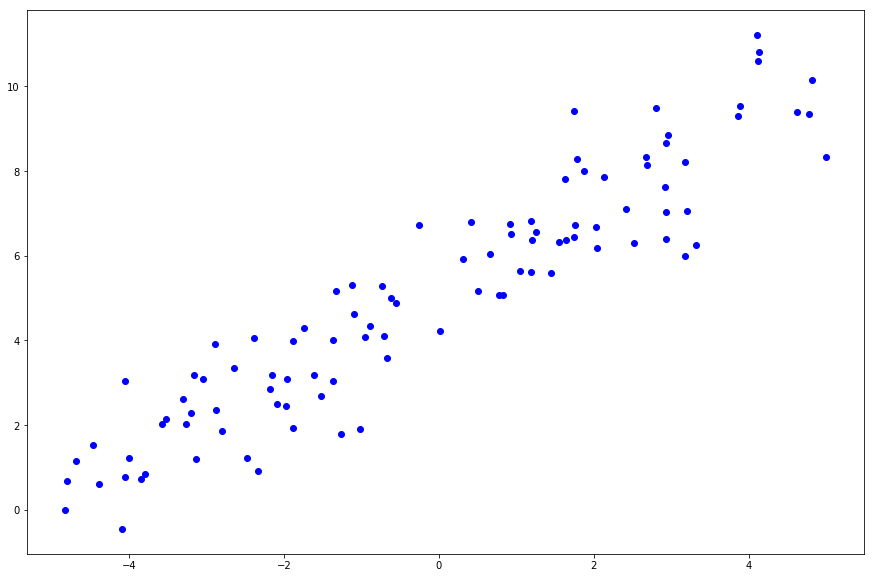

In [36]:
def gen_linear (a, b, eps, nbex):
    
    X = np.random.uniform(-5,5,nbex)
    X.reshape(-1,1)
    
    eps1 = np.random.normal(0, eps, nbex)
    
    Y = a*X + b + eps1
    return [X, Y]

def question11 ():
    a = 1
    b = 5
    eps = 1
    nbex = 100
    
    # Plot outputs
    X , Y = gen_linear (a, b, eps, nbex)
    plt . figure ()
    plt . scatter (X , Y, color='blue')
    plt.show()  
    
question11()

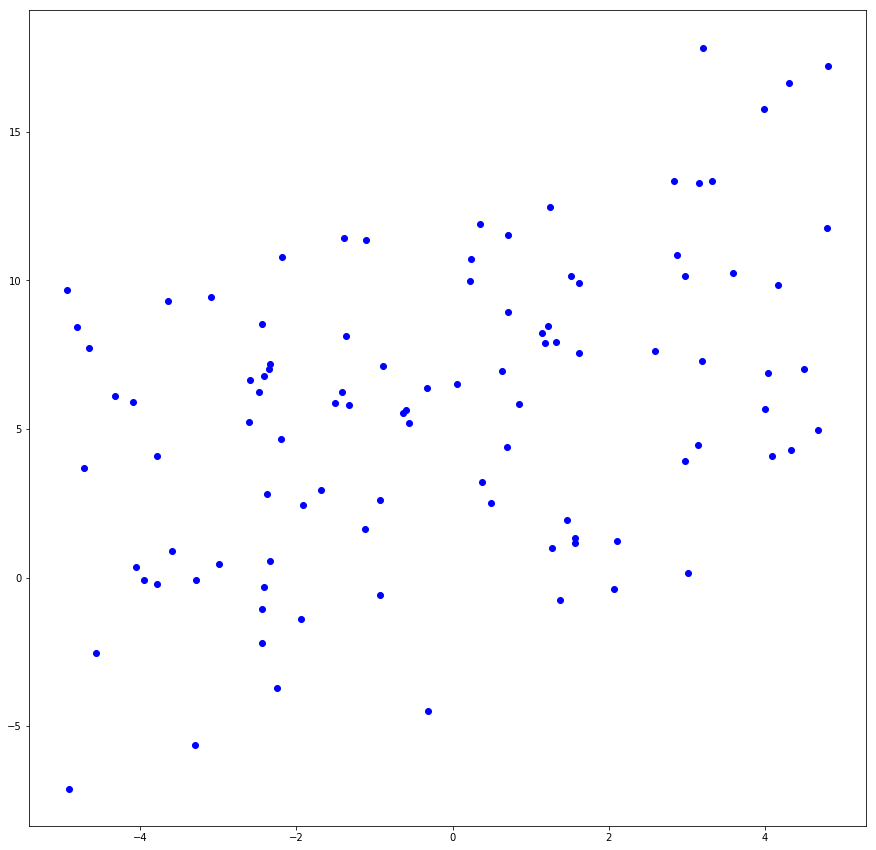

In [143]:
def gen_linear_general (a, b, eps, nbex, d):
    
    X = np.random.uniform(-5,5,[nbex, d])
    
    eps1 = np.random.normal(0, eps, nbex)
    eps1.reshape(-1,1)
    
    Y = np.dot(X, a.T) + b + eps1
    return [X, Y]

def question11_general ():
    d = 3
    a = np.ones(d)
    a.reshape(-1,1)
    
    b = 5
    eps = 1
    nbex = 100
    
    # Plot outputs
    X , Y = gen_linear_general (a, b, eps, nbex, d)
    plt . figure ()
    plt . scatter (X[:,1] , Y, color='blue' )
    plt.show()
    
question11_general ()

### Q 1.2 Données réelles :

In [14]:
# Descriptions des attributs :
# 1 - crim : per capita crime rate by town .
# 2 - zone : proportion of residential land zoned for lots over 25 ,000 sq . ft .
# 3 - indus : proportion of non - retail business acres per town .
# 4 - chas : Charles River dummy variable (= 1 if tract bounds river ; 0 otherwise ).
# 5 - nox : nitrogen oxides concentration ( parts per 10 million ).
# 6 - room : average number of rooms per dwelling .
# 7 - age : proportion of owner - occupied units built prior to 1940.
# 8 - empldist : weighted mean of distances to five Boston employment centres .
# 9 - radiushighway : index of accessibility to radial highways .
# 10 - taxproperty : full - value property - tax rate per $10 ,000.
# 11 - teacherratio : pupil - teacher ratio by town .
# 12 - blackprct : 1000( Bk - 0.63)^2 where Bk is the proportion of blacks by town .
# 13 - lowerstatus : lower status of the population ( percent ).
# Y - medianvalue : ( target value ) median value of owner - occupied homes in $1000s .

def read_file ( fn ):
    with open ( fn ) as f :
        names = f . readline ()
        X = np . array ([[ float ( x ) for x in l . strip (). split (" ")] for l in f . readlines ()])
    return X [: ,: -1] , X [: , -1]. reshape ( -1)

In [45]:
titles = ['Crim', 'Zone', 'Indus', 'Chas', 'Nox', 'Room', 'Age',
          'Empldist', 'Radiushighway', 'Taxproperty', 'Teacherratio', 
          'Blackprct', 'Lowerstatus']

def plot_nuages (X, m = 3):
    
    plt.rcParams['figure.figsize'] = [25.0, 25.0]
    
    plt.figure()
    
    n = X.shape[1]
    
    for i in range(m):
        for j in range(m):
            plt.subplot(n ,n ,j+1)
            
            label_cor = round(np.corrcoef(X[:,i], X[:,j])[0, 1],2)
            plt.scatter (X[:,i], X[:,j], label=label_cor)
            
            
            plt.title(titles[j])
            plt.ylabel(titles[i])
            plt.xticks([]),plt.yticks([])
            plt.legend()
        
        plt.show()   


 Crim  : 
	 Esperance :  3.61
	 Variance :  73.84

 Zone  : 
	 Esperance :  11.36
	 Variance :  542.86

 Indus  : 
	 Esperance :  11.14
	 Variance :  46.97

 Chas  : 
	 Esperance :  0.07
	 Variance :  0.06

 Nox  : 
	 Esperance :  0.55
	 Variance :  0.01

 Room  : 
	 Esperance :  6.28
	 Variance :  0.49

 Age  : 
	 Esperance :  68.57
	 Variance :  790.79

 Empldist  : 
	 Esperance :  3.8
	 Variance :  4.43

 Radiushighway  : 
	 Esperance :  9.55
	 Variance :  75.67

 Taxproperty  : 
	 Esperance :  408.24
	 Variance :  28348.62

 Teacherratio  : 
	 Esperance :  18.46
	 Variance :  4.68

 Blackprct  : 
	 Esperance :  356.67
	 Variance :  8318.28

 Lowerstatus  : 
	 Esperance :  12.65
	 Variance :  50.89


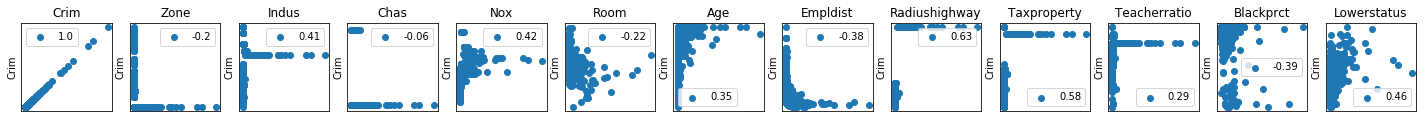

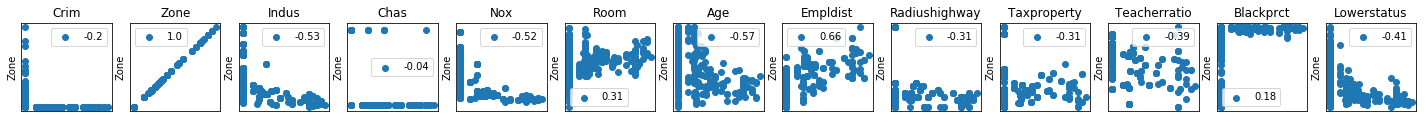

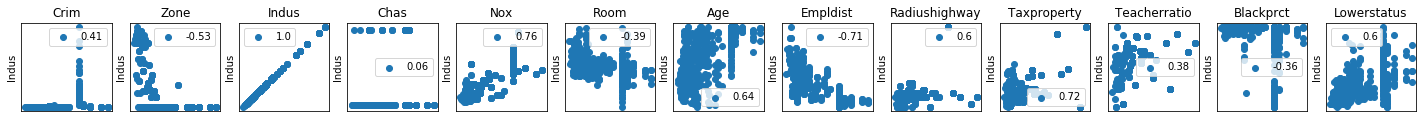

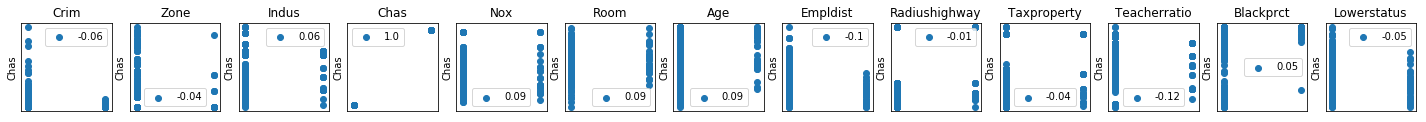

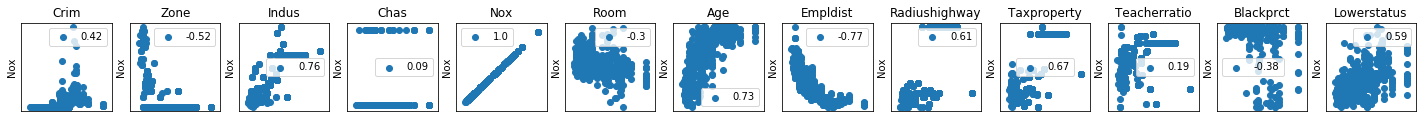

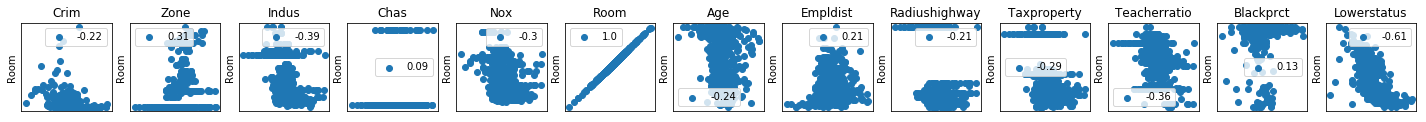

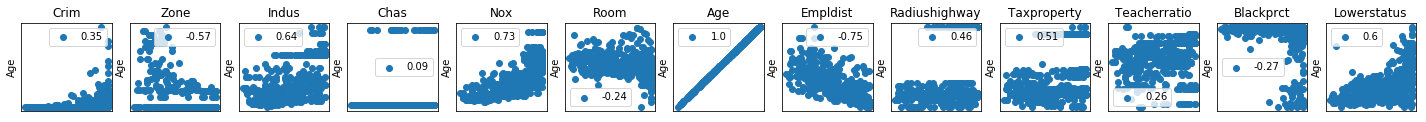

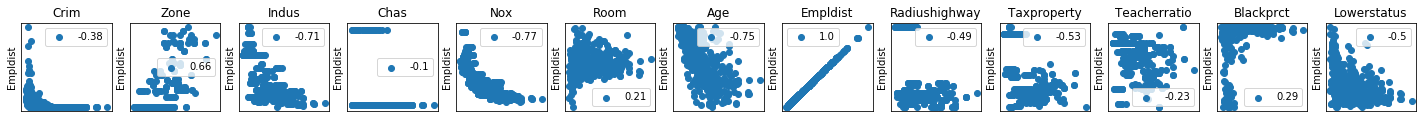

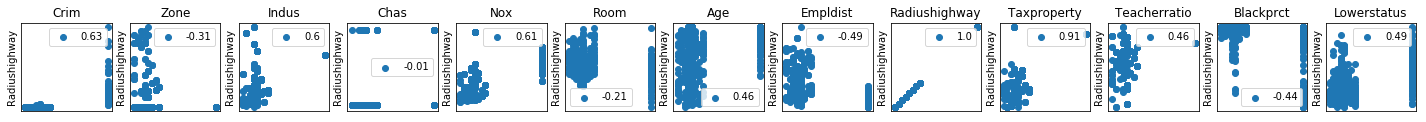

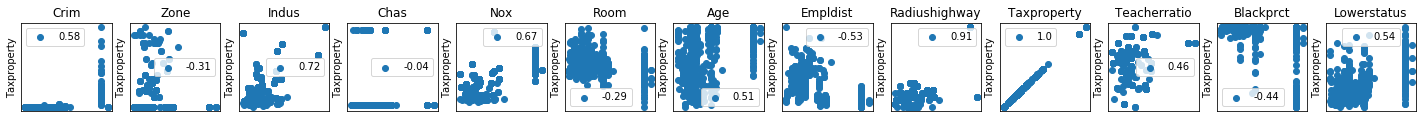

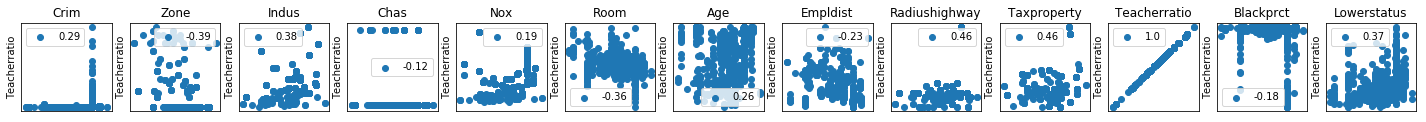

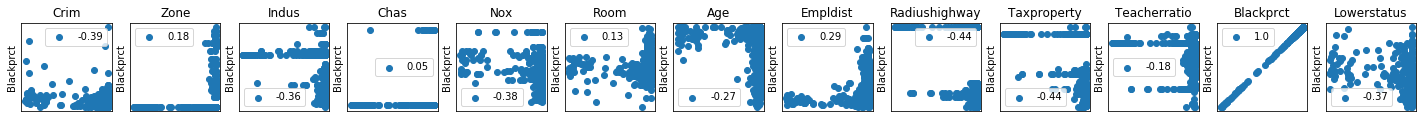

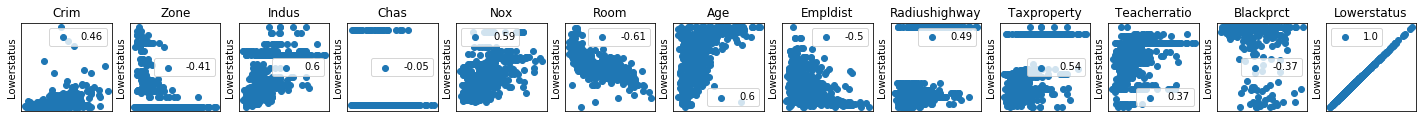

In [152]:
#  добавить комментарий !!!
def question12 (m=3):
    X_BH, Y_BH = read_file ('housing.csv')
    
    for i in range(X_BH.shape[1]):
        print("\n", titles[i], " : ")
        print("\t Esperance : ", round(np.mean(X_BH[:,i]),2))
        print("\t Variance : ", round(np.std(X_BH[:,i])**2,2))
    
    plot_nuages (X_BH, m)
    
    return [X_BH, Y_BH]
    
X_BH, Y_BH = question12 (13)

# 2 Régression linéaire

La régression linéaire suppose une relation linéaire entre la valeur à prédire - l’étiquette - et les différentes dimensions. La forme générique est donc $$ f_w(X) = w_0*1 + \sum_{i=1}^{d} w_i x_i $$ avec $ w \in R^{d+1}$ le vecteur de
paramètres.

$$ \hat{Y} = f_w(X) = Xw $$

$$ L(X, Y, w) = \frac{1}{2d} \sum_{i=1}^{d} (y_i  - w^T x_i)^2 = \frac{1}{2d}||Y - \hat{Y}||_{2}^{2}  = \frac{1}{2d} (Y - Xw)^T(Y - Xw)
$$ 

$$
\frac{\partial L}{\partial w} = \frac{1}{2d} (-2X^TY+2X^TXw) 
$$

$$
\frac{\partial L}{\partial w} = 0 <=> w = (X^TX)^{-1}X^TY
$$


### Q 2.1 (Préambule)

In [50]:
def predict (w,X):
    X_dot = np.ones([X.shape[0], X.shape[1]+1])
    X_dot[:,1:] = X
    
    return np.dot(X_dot, w)

def mse(yhat,y):
    return 0.5*np.mean((y-yhat)**2)

def regress(X,Y):
    X_dot = np.ones([X.shape[0], X.shape[1]+1])
    X_dot[:,1:] = X
    
    w = np.dot(np.dot(LA.pinv(np.dot(X_dot.T, X_dot)),X_dot.T),Y)
    
    return w   

### Q 2.2 Données artificielles

In [133]:
# Evolution de l’erreur moyenne des moindres carrés en fonction du nombre de données utilisées
def eval_data_art_N (a, b, d, eps, nbex): 
    X_art , Y_art = gen_linear_general (a, b, eps, nbex, d)
    AB = np.concatenate((np.array([b]), a), axis=0)
    
    result_y = np.zeros(nbex)
    result_w = np.zeros(nbex)
    grille = np.arange(0, nbex, 1)
    
    for n in grille:
        w_art = regress(X_art[0:n, :] , Y_art[0:n])
        result_y[n] = mse(predict(w_art, X_art[0:n, :]), Y_art[0:n])
        result_w[n] = mse(w_art, AB)
        
    return [grille, result_y, result_w]

# Evolution de l’erreur moyenne des  moindres carrés en fonction du bruit
def eval_data_art_eps (a, b, d, eps, nbex): 
    
    grille = np.arange(0.1, eps+ 0.1, 0.1)
    result_y = np.zeros(grille.size)
    result_w = np.zeros(grille.size)
    
    AB = np.concatenate((np.array([b]), a), axis=0)
    
    for i in range(grille.size):
        X_art , Y_art = gen_linear_general (a, b, grille[i], nbex, d)
        w_art_eps = regress(X_art, Y_art)
        #print('\n', w_art_eps, AB)
        
        result_y[i] = mse(predict(w_art_eps, X_art), Y_art)
        result_w[i] = mse(w_art_eps, AB)
    
    
    return [grille, result_y, result_w]

In [140]:
a_prim = np.ones((3,1))
a_prim.shape[0]

3

C:\Users\13_Vi\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2957: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
C:\Users\13_Vi\Anaconda3\lib\site-packages\numpy\core\_methods.py:80: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


w_predict =  [4.9319106  0.97972137 0.97954298 1.04767338]


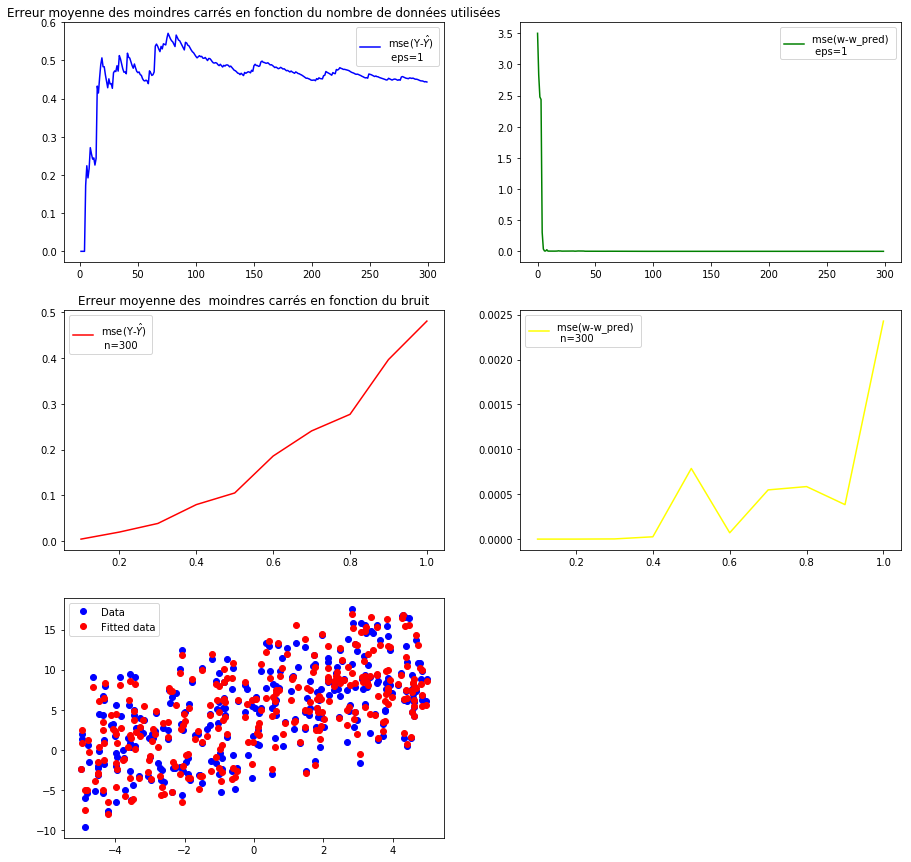

In [148]:
def question221 (a = np.ones(3)):
    a.reshape(-1,1)
        
    d = a.shape[0]
    b = 5
    
    eps = 1
    nbex = 300
    
    grille_N, eval_N_Y, eval_N_w = eval_data_art_N (a, b, d, eps, nbex)
    
    grille_eps, eval_eps_Y, eval_eps_w = eval_data_art_eps (a, b, d, eps, nbex)
    
    ax1 = plt.subplot(321)
    ax1.plot(grille_N , eval_N_Y, color='blue', label='mse(Y-$\hat Y$) \n eps=1')
    ax1.set_title('Erreur moyenne des moindres carrés en fonction du nombre de données utilisées')
    ax1.legend()
    
    ax12 = plt.subplot(322)
    ax12.plot(grille_N , eval_N_w, color='green', label='mse(w-w_pred) \n eps=1')
    ax12.legend()
    #ax12.set_title('Erreur moyenne des moindres carrés en fonction du nombre de données utilisées')
    
    ax2 = plt.subplot(323)
    ax2.plot(grille_eps , eval_eps_Y, color='red', label='mse(Y-$\hat Y$) \n n=300' )
    ax2.set_title('Erreur moyenne des  moindres carrés en fonction du bruit')
    ax2.legend()
    
    ax22 = plt.subplot(324)
    ax22.plot(grille_eps , eval_eps_w, color='yellow', label='mse(w-w_pred) \n n=300' )
    #ax22.set_title('Erreur moyenne des  moindres carrés en fonction du bruit')
    ax22.legend()
    
    X_art , Y_art = gen_linear_general (a, b, eps, nbex, d)
    ax3 = plt.subplot(325)
    ax3.plot(X_art[:,1] , Y_art, 'bo', label='Data')
    ax3.plot(X_art[:,1], predict(regress(X_art, Y_art), X_art) , 'ro', label='Fitted data')
    ax3.legend()
    
    print('w_predict = ', regress(X_art, Y_art) )
    
    plt.show()

question221 ()

C:\Users\13_Vi\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2957: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
C:\Users\13_Vi\Anaconda3\lib\site-packages\numpy\core\_methods.py:80: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


w_predict =  [ 4.99651771  0.96885515  0.97365097  1.01369642 -0.00913401]


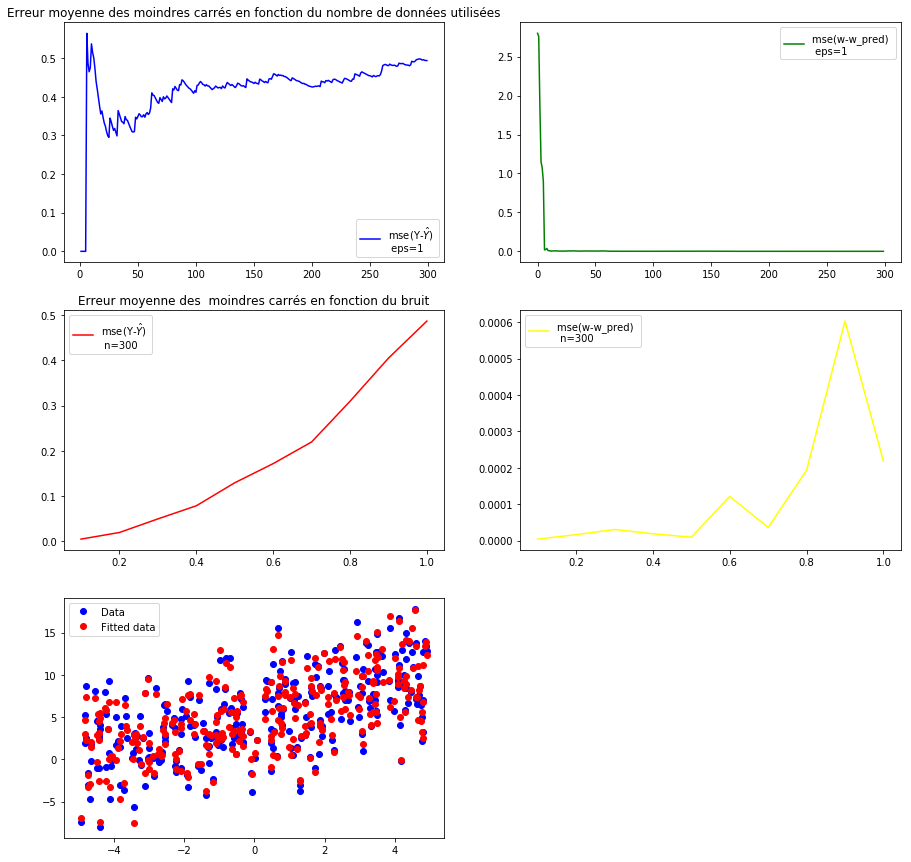

In [149]:
def question22 ():
    a = np.array([1,1,1,0])
    a.reshape(-1,1)
    question221 (a)
    
question22 ()

On constate que l'erreur quadratique entre le $w$ réel et le $w$ prédit est du même ordre de grandeur avec ou sans la dimension supplémentaire de coefficient nulle dans $w$ (erreur de l'ordre de quelques $10^{-4}$). On voit cependant que l'on obtient des valeur du coefficient prédit de l'ordre de $10^{-2}$ au lieu de 0, ce qui forment des erreurs 100 fois plus grandes que l'erreur quadratique moyenne sur les coefficients.

Il est donc plus difficile de prédire les coefficients correspondant à des variables non-corrélés avec Y.

### Q 2.3 Données réelles

In [158]:
w_BH = regress(X_BH, Y_BH)
print('w_BH = ', w_BH )
print('\n ERROR de Y = ', mse(predict(w_BH, X_BH), Y_BH))

w_BH =  [ 3.64594884e+01 -1.08011358e-01  4.64204584e-02  2.05586264e-02
  2.68673382e+00 -1.77666112e+01  3.80986521e+00  6.92224641e-04
 -1.47556685e+00  3.06049479e-01 -1.23345939e-02 -9.52747232e-01
  9.31168327e-03 -5.24758378e-01]

 ERROR de Y =  10.947415590864603


On va considérer que les poids inférieurs à $10^{-1}$ sont négligeables et correspondent à des variables non-corrélés.
Il s'agit de age, taxproperty et blackprct.
Les variables les plus corrélés à Y sont quant à elles nox puis chas, room et empldist.

In [196]:
X_BH_copy = X_BH.copy()
X_BH_copy[:, 7] = 10*X_BH[:, 7]
w_BH_copy = regress(X_BH_copy, Y_BH)
print('w_BH = ', w_BH_copy )
print('\n ERROR de Y = ', mse(predict(w_BH_copy, X_BH_copy), Y_BH))

w_BH =  [ 3.64594884e+01 -1.08011358e-01  4.64204584e-02  2.05586264e-02
  2.68673382e+00 -1.77666112e+01  3.80986521e+00  6.92224640e-04
 -1.47556685e-01  3.06049479e-01 -1.23345939e-02 -9.52747232e-01
  9.31168327e-03 -5.24758378e-01]

 ERROR de Y =  10.947415590864603


#### Q 2.3.2
On constate trivialement que le modèle étant linéaire, si on multiplie les valeurs d'un paramètre par un facteur $\lambda$, le coefficient prévu pour ce paramètre est divisé par $\lambda$. La MSE est donc bien évidemment la même.

On ne peut donc pas se baser sur l'ordre de grandeur d'un coefficient pour en déduire la corrélation de Y avec le paramètre correspondant. Les conclusions la question précédente ne sont donc pas fondées.

On sera donc tenté de normaliser les valeurs de chaque paramètre avant de s'oser à une interprétation des résultats.

In [215]:
def pre_trait (X, means=None, stds=None):
    n, m = X.shape
    if not means:
        means = [np.mean(X[:, j]) for j in range(m)]
    if not stds:
        stds = [np.std(X[:, j]) for j in range(m)]
    
    result = np.array([[(X[i, j]-means[j])/stds[j] for j in range(m)] for i in range(n)])

    return [means, stds, result]

means, stds, X_BH_copy = pre_trait(X_BH)

w_BH_copy = regress(X_BH_copy, Y_BH)
print('w_BH = ', w_BH_copy )
print('\n ERROR de Y = ', mse(predict(w_BH_copy, X_BH_copy), Y_BH))

w_BH =  [ 2.25328063e+01 -9.28146064e-01  1.08156863e+00  1.40899997e-01
  6.81739725e-01 -2.05671827e+00  2.67423017e+00  1.94660717e-02
 -3.10404426e+00  2.66221764e+00 -2.07678168e+00 -2.06060666e+00
  8.49268418e-01 -3.74362713e+00]

 ERROR de Y =  10.947415590864601


TODO : MSE

In [207]:
# Evolution de l’erreur moyenne des moindres carrés en fonction du nombre de données utilisées
def eval_data_N (X, Y): 
    n, m = X.shape
    
    grille = np.arange(0, n, 1)
    result = np.zeros(grille.size)
    
    for i in grille:
        w_data = regress(X[0:i, :] , Y[0:i])
        result[i] = mse(predict(w_data, X[0:i, :]), Y[0:i])
        
    return [grille, result]


C:\Users\13_Vi\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2957: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
C:\Users\13_Vi\Anaconda3\lib\site-packages\numpy\core\_methods.py:80: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


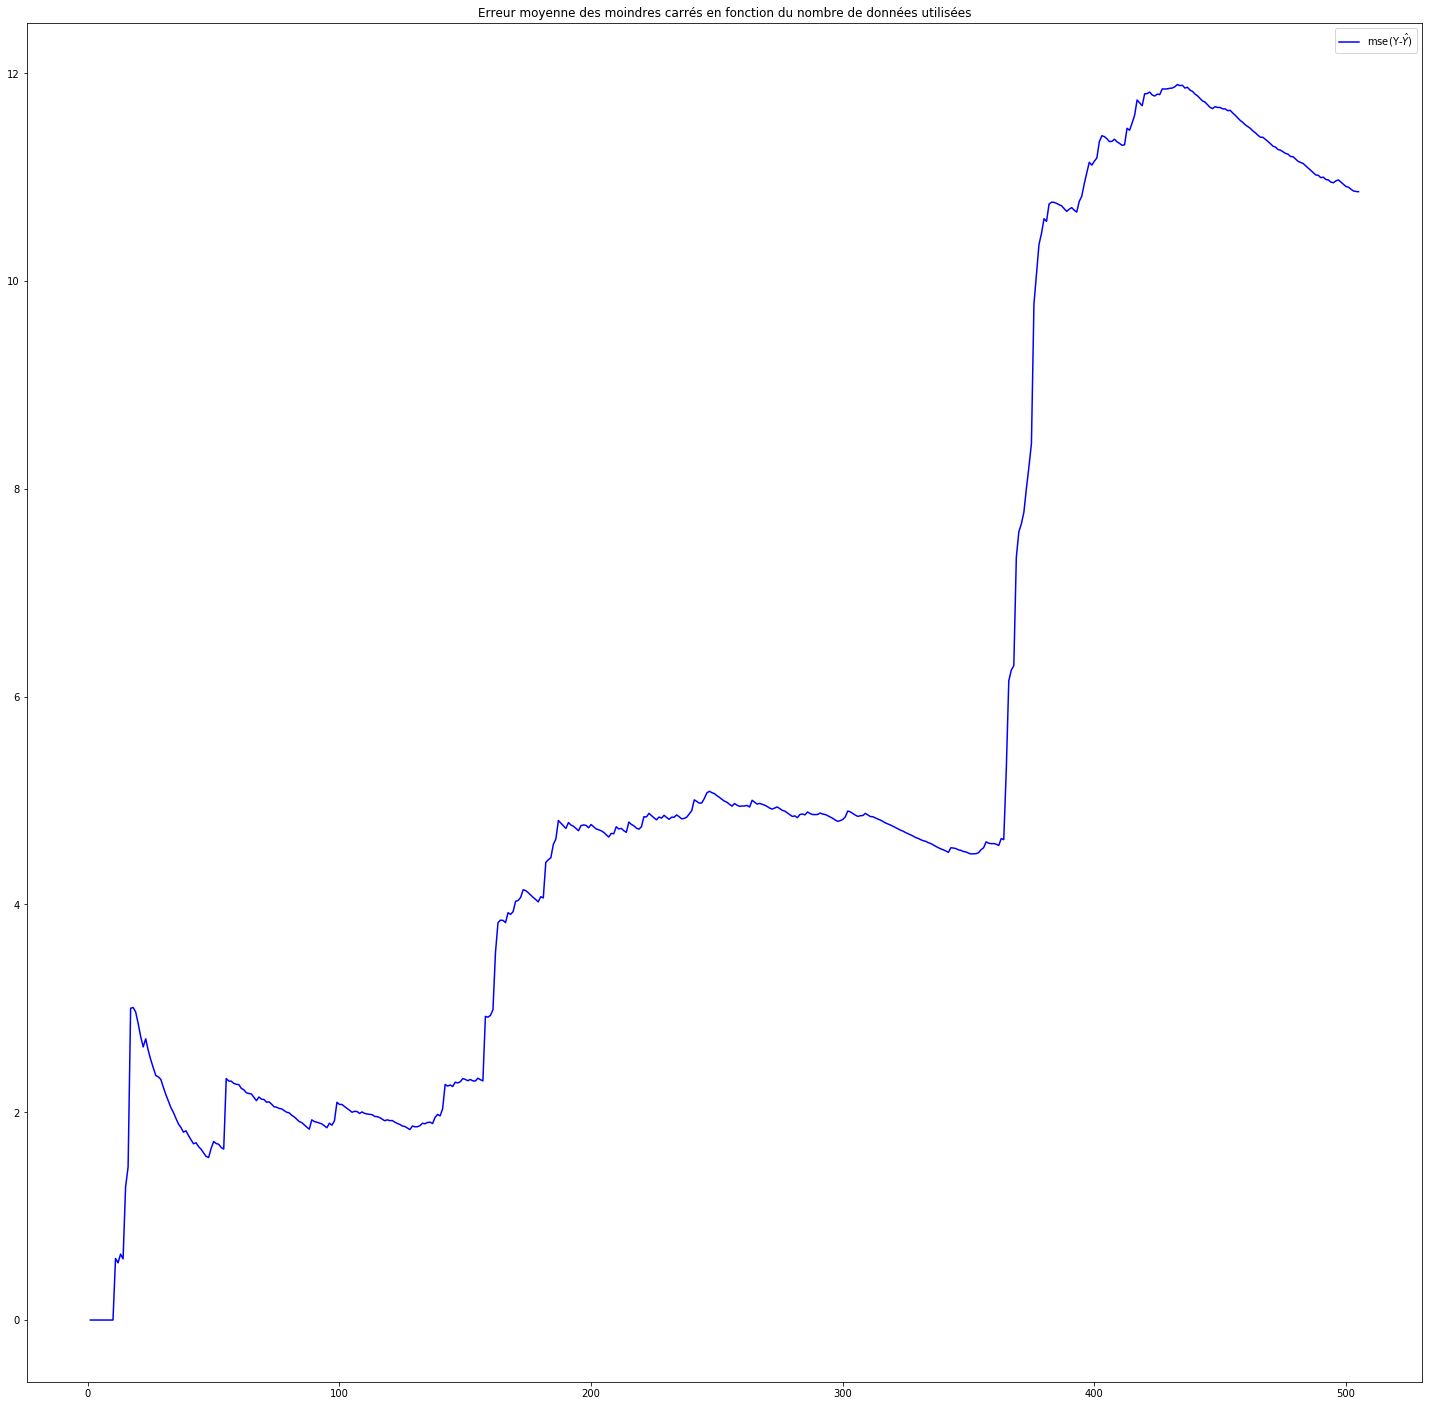

In [219]:
def question232 ():
    
    grille_N , eval_N = eval_data_N (X_BH_copy, Y_BH)
    plt.plot(grille_N , eval_N, color='blue', label='mse(Y-$\hat Y$)')
    plt.title('Erreur moyenne des moindres carrés en fonction du nombre de données utilisées')
    plt.legend()
    
question232 ()

w_BH =  [25.48466667  0.80403103  0.38477204  0.1499851   0.17230003 -0.9594355
  6.43586158 -1.3778012  -2.00344014  0.27118625 -1.00500725 -1.46479276
  0.72579617 -0.68036643]

 ERROR de Y =  183.0327670438503


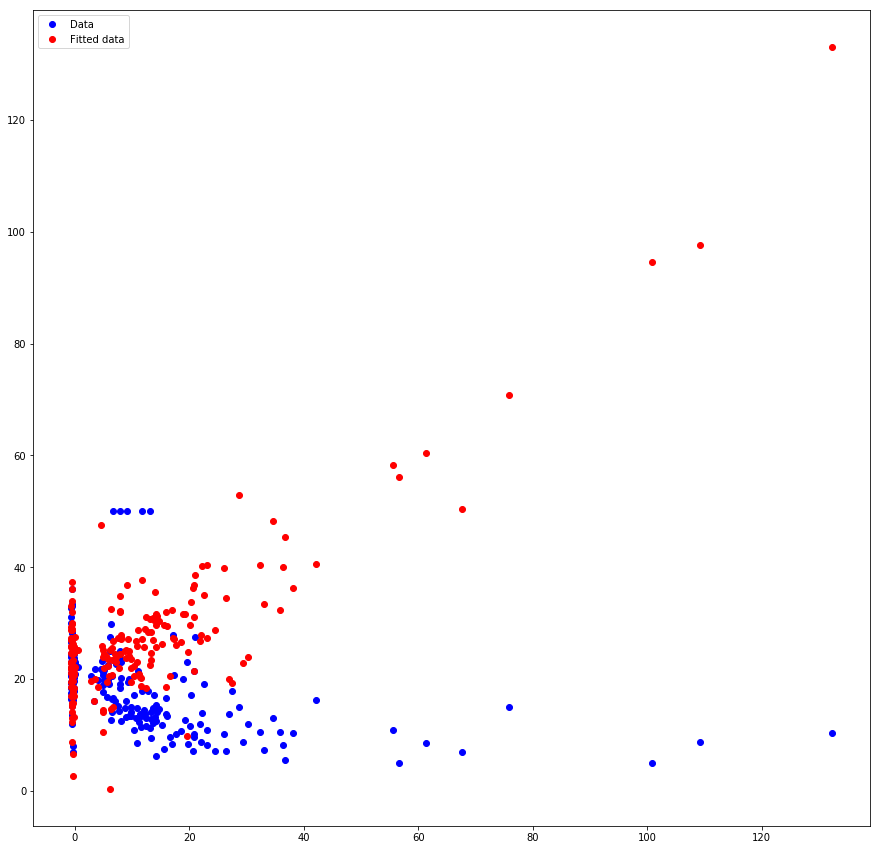

In [228]:
def question233 ():
    X_BH_train = X_BH[0:300,:]
    X_BH_test = X_BH[300:,:]
    
    Y_BH_train = Y_BH[0:300]
    Y_BH_test = Y_BH[300:]
    
    means_train, stds_train, X_BH_train_pre = pre_trait (X_BH_train)
    _, _, X_BH_test_pre = pre_trait(X_BH_test, means_train, stds_train)
    
    w_BH_train = regress(X_BH_train_pre, Y_BH_train)
    print('w_BH = ', w_BH_train)
    print('\n ERROR de Y = ', mse(predict(w_BH_train, X_BH_test_pre), Y_BH_test))
    
    plt.plot(X_BH_test_pre[:,0] , Y_BH_test, 'bo', label='Data')
    plt.plot(X_BH_test_pre[:,0], predict(w_BH_train, X_BH_test_pre) , 'ro', label='Fitted data')
    plt.legend()    
    plt.show()
    
question233()

In [204]:
    X_art , Y_art = gen_linear_general (a, b, eps, nbex, d)
    ax3 = plt.subplot(325)
    ax3.plot(X_art[:,1] , Y_art, 'bo', label='Data')
    ax3.plot(X_art[:,1], predict(regress(X_art, Y_art), X_art) , 'ro', label='Fitted data')
    ax3.legend()
    
    print('w_predict = ', regress(X_art, Y_art) )
    
    plt.show()

(206, 13)

# 3 Ridge Régression


Si la matrice $X^TX$ est non inversible (ou singulière) le problème de régression linéaire n'est pas bien posé et on ne peut pas utiliser la definition de $w$ précédente. On a besoin d'utiliser régularisation :

$$ L(X, Y, w) = \frac{1}{2d}||Y - \hat{Y}||_{2}^{2} + \lambda ||w||_{2}^{2}
$$ 

$$
w = (X^TX + \lambda E)^{-1}X^T Y
$$


In [ ]:
def ridge_regress(X,Y,lmb):
    X_dot = np.ones([X.shape[0], X.shape[1]+1])
    X_dot[:,1:] = X
    
    XTX = np.dot(X_dot.T, X_dot)
    I = np.eye(XTX.shape[0])
    
    w = np.dot(np.dot(LA.pinv(XTX + lmb*I),X_dot.T),Y)
    
    return w   

In [ ]:
plot(logy=True)

# 4 LASSO

Le Lasso remplace la norme $l_2$ au carré par une norme $l_1$. On résout dans ce cas le problème suivant :

$$
\hat f = argmin_w \frac{1}{2n} \sum_{i=1}^{n} ||Xw-Y||_2^2 + \lambda||w||_1 , \ avec \ ||w||_1 = \sum_{i=0}^{d} |w_i|
$$

# 5 Classification plug-in

On considère dans cette partie un problème de classification binaire à valeur dans $Y = \{−1, +1\}$. Nous noterons $η(x) = P(y = 1 | \ x) \ et \ X = \{x^i, y^i\}^{N}_{i=1}$ l’ensemble d’apprentissage. Dans le cadre de la classification plug-in, le problème de classification est vu comme un problème de régression
aux moindres carrés : il s’agit de trouver la fonction linéaire $f_w = \sum_{i=1}^{d} w_i x_i + w_0$ qui minimise $ E[(f_w(x) − y)^2]$ (soit trouver fw qui approxime au mieux $2η(x) − 1$ ).

- Inférence : le signe de $f_w(x)$ conduit à la classification de $x : +1$ si positif, $−1$ sinon.
- Coût à optimiser : $L(w, X) = \sum_{i=1}^{N} (f_w(x) − y)^2 = \sum_{i=1}^{N} (w_0 +\sum_{j=1}^{d} w_j x_j^i− y^i)^2 $


In [164]:
def load_usps ( filename ):
    with open ( filename ,"r") as f :
        f . readline ()
        data =[ [ float ( x ) for x in l . split ()] for l in f if len ( l . split ()) >2]
    tmp = np . array ( data )
    return tmp [: ,1:] , tmp [: ,0]. astype ( int )

def show_usps ( data ):
    plt . imshow ( data . reshape ((16 ,16)), interpolation ='nearest', cmap ='gray')

In [154]:
X_USPS_train, Y_USPS_train = load_usps('USPS_train.txt')
X_USPS_test, Y_USPS_test = load_usps('USPS_test.txt')

3


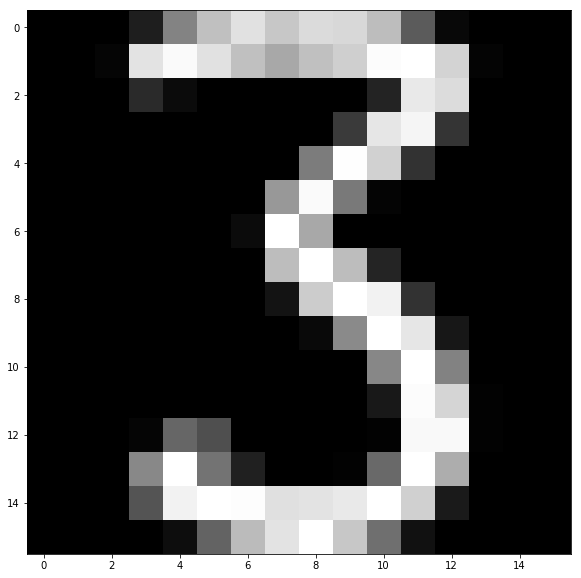

In [167]:
show_usps(X_USPS_train[1300,:])
print(Y_USPS_train[1300])